In [1]:
import importlib
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
from skimage import data, img_as_float
from skimage import exposure
from PIL import Image

# Example of the horse data set 

In [2]:
Im = np.array(Image.open('../../FM_Eikonal/data/weizmann_horse_db/horse/horse028.png').copy())
Im_Mask = np.array(Image.open('../../FM_Eikonal/data/weizmann_horse_db/mask/horse028.png').copy())

(-0.5, 217.5, 204.5, -0.5)

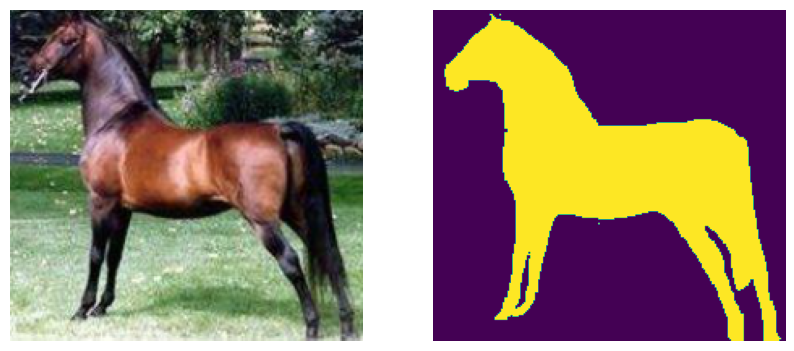

In [3]:
fig = plt.subplots(1,2,figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(Im)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Im_Mask)
plt.axis('off')

# Prepare Training Data Set 

In [2]:
# Prepare the training set for extracting prototypica covariance descriptors for the horse image class

# Random indices 

Ind = np.random.choice(327,20)
Train_Im = []
Train_Mask = []
for im_num in Ind:
    if len(str(im_num)) == 3:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)
    elif len(str(im_num)) == 2:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse0'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse0'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)
    elif len(str(im_num)) == 1:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse00'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse00'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)

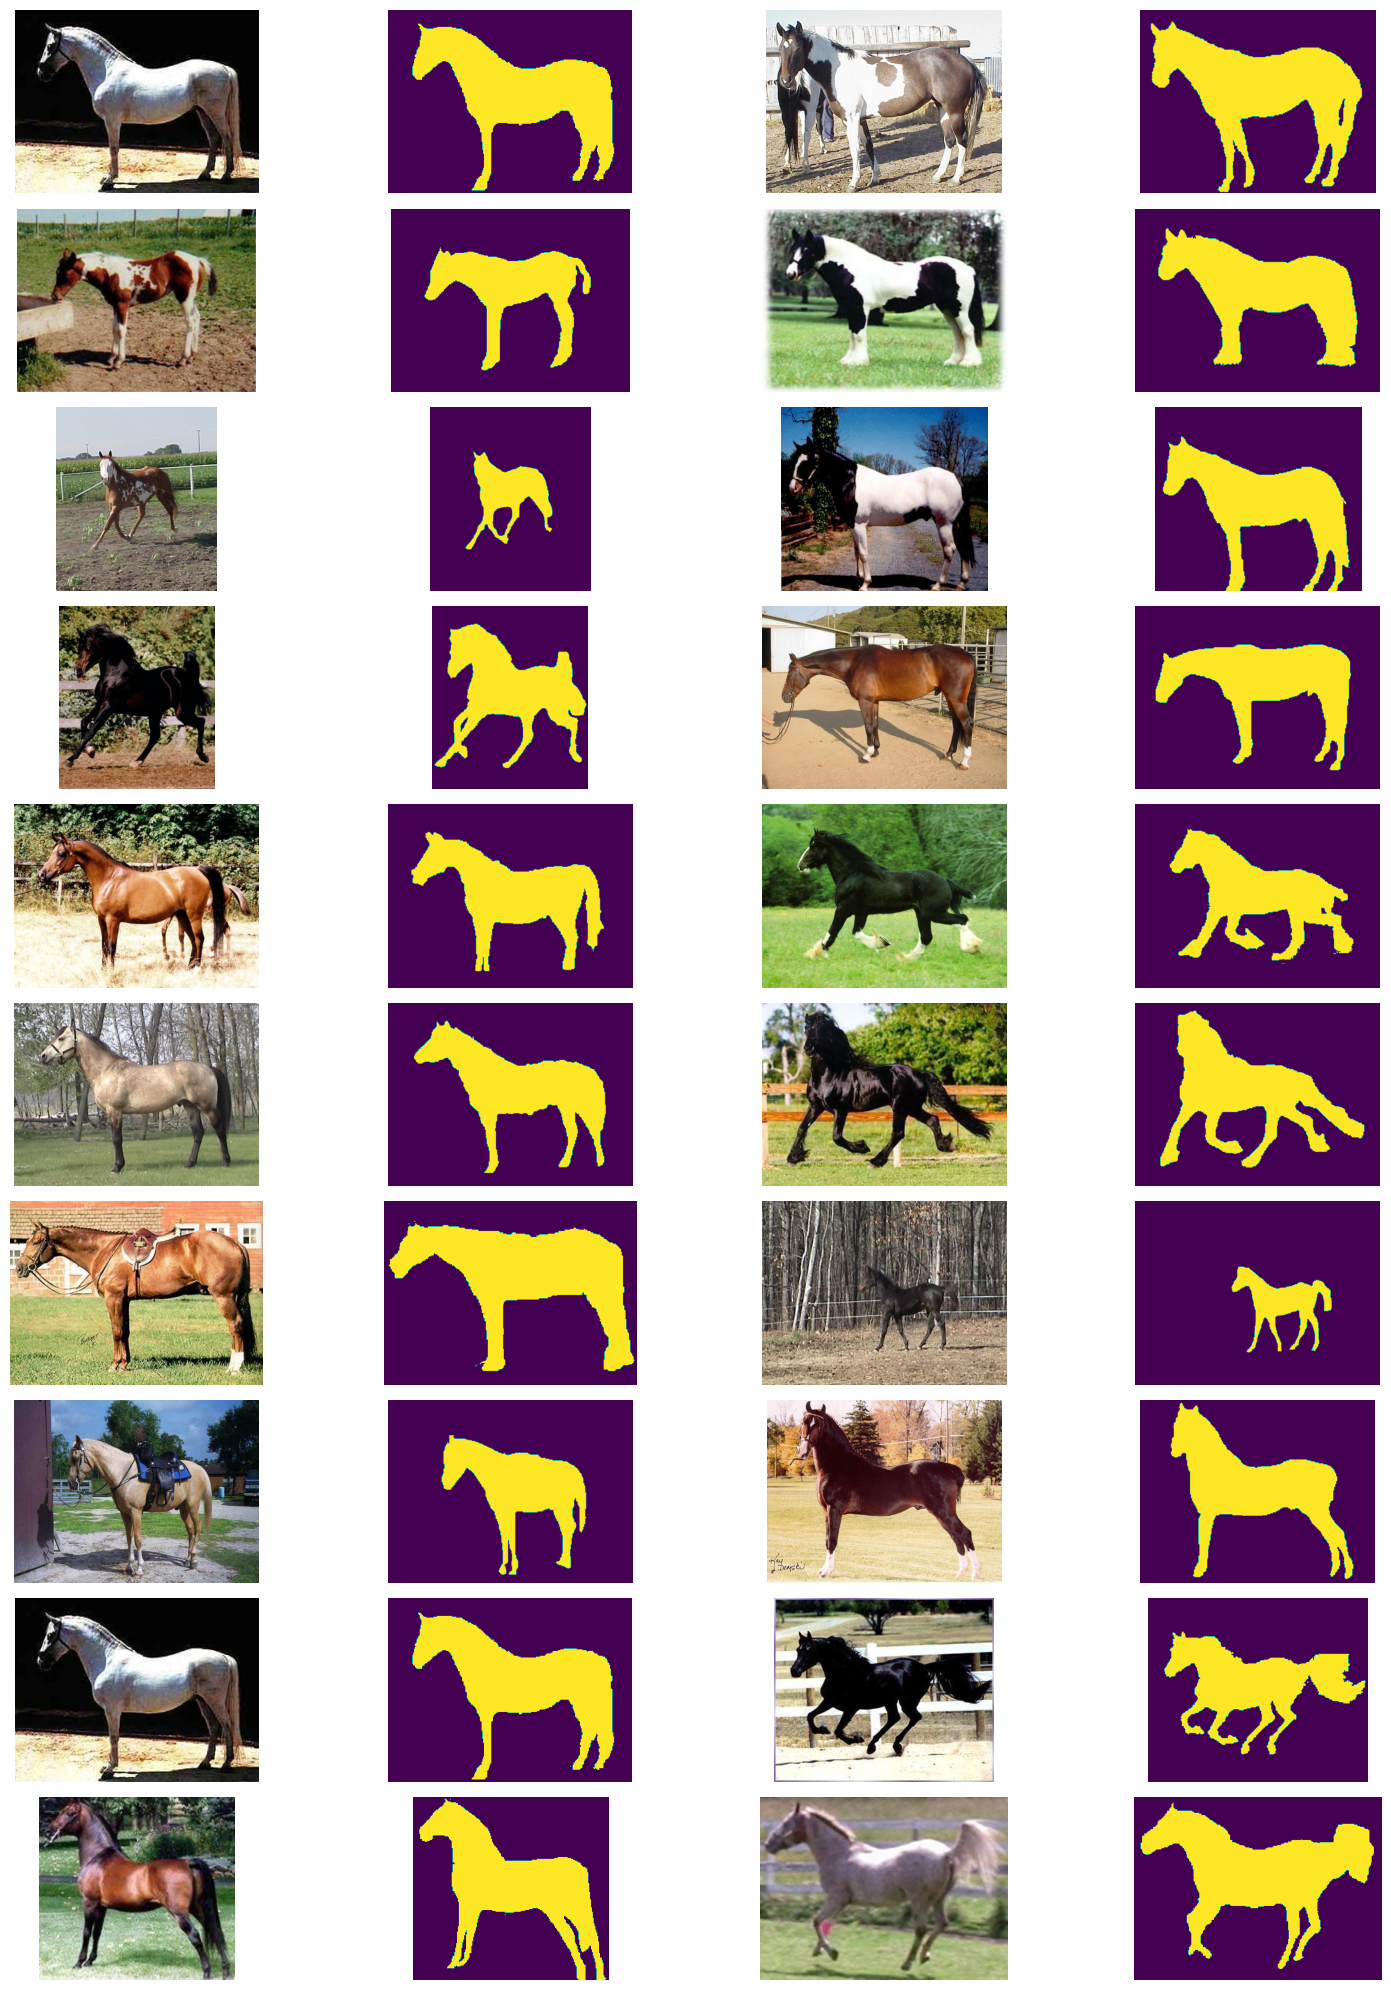

In [3]:
# Create a 10x4 grid of subplots
fig, axes = plt.subplots(10, 4, figsize=(16,20))  # Adjust size to fit

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop over images and axes
i = 0
for l in range(20):
    ax = axes[i]
    ax.imshow(Train_Im[l].astype(int), cmap='viridis')  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    i+= 1
    ax = axes[i]
    ax.imshow(Train_Mask[l], cmap='viridis')  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    i+= 1


plt.tight_layout()
plt.show()
    

# Compute pixel-wise Covariance Features

In [4]:
sys.path.append('/home/dmitrij/Documents/HDE_Code_Folder/Feature_Extraction_Lib/src/Covariance_Descriptor/')
from Feature_Extractor import Features

#Cov_Features = Features(Train_Im[0],chanels_num=3)

In [5]:
from scipy.ndimage import gaussian_filter

Train_Descripor_pd = []
for l in range(20):
    Cov_Features = Features(Train_Im[l],chanels_num=3)
    Train_Descripor_pd.append(Cov_Features.covariance_from_fvec())

In [6]:
for l in range(20):
    for chan in range(3):
        Train_Descripor_pd[l][:,:,chan,:,:] += 0.1*np.eye(7)

# Extract Covariance Descriptors 

In [ ]:
from Geometric_Kmeans import Return_Descriptors

Horse_Descriptors = (Return_Descriptors(Train_Descripor_pd,Train_Mask,20))


Extract Descriptors from Data_Sample ****0*****
Extract Descriptors from Region ****0*****
[[-2.30258509  0.          0.         ... -2.30258509  0.
  -2.30258509]
 [-2.30258509  0.          0.         ... -2.30258509  0.
  -2.30258509]
 [-2.30258509  0.          0.         ... -2.30258509  0.
  -2.30258509]
 ...
 [ 4.0384804   3.02240774  0.28967904 ...  1.55772967 -0.23774396
   5.23844112]
 [ 3.66152454  3.94502306  0.17558426 ...  0.892752   -0.11980764
   5.14560055]
 [ 3.46068092  4.05258012  0.02278557 ... -0.309238    0.16956078
   4.98842481]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
(18840, 7, 7)
Requered Iterations -------2.9592034816741943------- seconds
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
(6813, 7, 7)
Requered Iterations -------7.337336301803589------- seconds
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0